In [293]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [294]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.boston_housing.load_data()

In [295]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(404, 13) (404,) (102, 13) (102,)


In [296]:
X_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
y_columns = ['MEDV']

In [297]:
train_X = pd.DataFrame(train_X, columns=X_columns)
train_y = pd.DataFrame(train_y,columns=y_columns)
test_X = pd.DataFrame(test_X, columns=X_columns)
test_y = pd.DataFrame(test_y, columns=y_columns)
#test_y.compress = y_columns

In [298]:
train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [299]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_X)
test_scaled = scaler.fit_transform(test_X)
train_X = pd.DataFrame(train_scaled, columns=X_columns)
test_X = pd.DataFrame(test_scaled, columns=X_columns)

In [300]:
train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002399,0.000,0.236437,0.0,0.129630,0.395236,0.608651,0.517509,0.086957,0.086042,0.563830,1.000000,0.399283
400,0.001751,0.200,0.238270,0.0,0.162551,0.518784,0.138002,0.344380,0.086957,0.066922,0.638298,1.000000,0.134106
401,0.000319,0.350,0.205279,0.0,0.108848,0.478311,0.210093,0.575229,0.000000,0.221797,0.457447,0.912628,0.168322
402,0.024085,0.000,0.700880,0.0,1.000000,0.415957,0.984552,0.051520,0.173913,0.411090,0.223404,0.659716,0.387969


In [301]:
# train_stats = train_X.describe()
# train_stats = train_stats.transpose()
# 
# train_X_mean = train_stats["mean"] 
# train_X_std = train_stats["std"]
# 
# def norm(data,mean,std):
#     return (data - mean) / std
# 
# train_X = norm(train_X,train_X_mean,train_X_std)
# test_X = norm(test_X,train_X_mean,train_X_std)
# 
# train_X

In [302]:
model = Sequential()

In [303]:
#model.add(Input(shape=(404,13))
model.add(Dense(128, input_shape=(train_X.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

In [304]:
model.compile(optimizer=Adam(), loss='mse', metrics='mse')

In [305]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_66 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [306]:
epoch = 100
valid_split = 0.2
history = model.fit(x=train_X,y=train_y,validation_split=valid_split,epochs=epoch)

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 563.4461 - mse: 563.4461 - val_loss: 617.7349 - val_mse: 617.7349
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 532.6920 - mse: 532.6920 - val_loss: 576.8453 - val_mse: 576.8453
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 484.7932 - mse: 484.7932 - val_loss: 509.5264 - val_mse: 509.5264
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 408.4163 - mse: 408.4163 - val_loss: 405.0970 - val_mse: 405.0970
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 303.0459 - mse: 303.0459 - val_loss: 276.1887 - val_mse: 276.1887
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 194.3511 - mse: 194.3511 - val_loss: 168.2219 - val_mse: 168.2219
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 132.5647 - mse: 132.5647 - val_loss: 126.5864 - val_mse: 126.5864
Epoch 8/100
11/11 [=======

In [307]:
model.evaluate(x=test_X,y=test_y)

4/4 [==============================] - 0s 995us/step - loss: 43.8499 - mse: 43.8499


[43.84987258911133, 43.84987258911133]

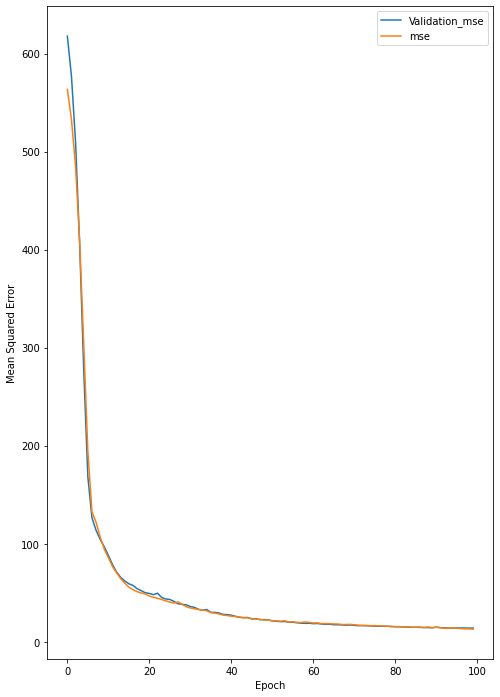

In [308]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(8, 12))

plt.subplot(1, 1, 1)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(hist['epoch'], hist['val_mse'],
            label='Validation_mse')
plt.plot(hist['epoch'], hist['mse'],
            label='mse')
plt.legend()

plt.show()